In [4]:
import numpy as np

In [5]:
import tensorflow as tf

In [6]:
import pandas as pd

In [7]:
import sklearn as sk

In [8]:
sk.__version__

'1.3.2'

In [9]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')

In [10]:
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [11]:
X = dataset.iloc[:, 0:9].values
##Column 0 is Gender Column, Negative 1 is the ID##
y = dataset.iloc[:, -1].values

In [12]:
X

array([['Female', 80.0, 0, ..., 6.6, 140, 0],
       ['Female', 54.0, 0, ..., 6.6, 80, 0],
       ['Male', 28.0, 0, ..., 5.7, 158, 0],
       ...,
       ['Male', 66.0, 0, ..., 5.7, 155, 0],
       ['Female', 24.0, 0, ..., 4.0, 100, 0],
       ['Female', 57.0, 0, ..., 6.6, 90, 0]], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])
##0 Is Female , 1 is Male##

In [14]:
print(X)

[[0 80.0 0 ... 6.6 140 0]
 [0 54.0 0 ... 6.6 80 0]
 [1 28.0 0 ... 5.7 158 0]
 ...
 [1 66.0 0 ... 5.7 155 0]
 [0 24.0 0 ... 4.0 100 0]
 [0 57.0 0 ... 6.6 90 0]]


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
## Hot Encoding Smoke History# 

In [16]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')

In [17]:
X = np.array(ct.fit_transform(X))

In [18]:
print(X)

[[0.0 0.0 0.0 ... 6.6 140 0]
 [1.0 0.0 0.0 ... 6.6 80 0]
 [0.0 0.0 0.0 ... 5.7 158 0]
 ...
 [0.0 0.0 0.0 ... 5.7 155 0]
 [0.0 0.0 0.0 ... 4.0 100 0]
 [0.0 1.0 0.0 ... 6.6 90 0]]


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()

In [23]:
X_train = sc.fit_transform(X_train)

In [24]:
X_test = sc.transform(X_test)

In [25]:
#ANN Normal#

In [26]:
ann = tf.keras.models.Sequential()

In [27]:
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))

In [28]:
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))

In [29]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [30]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [31]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 15)

Epoch 1/15


1875/1875 [==============================] - 3s 1ms/step - loss: 0.1436 - accuracy: 0.9536
Epoch 2/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0261 - accuracy: 0.9999
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0106 - accuracy: 1.0000
Epoch 4/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 5/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 6/15
1875/1875 [==============================] - 3s 1ms/step - loss: 9.9913e-04 - accuracy: 1.0000
Epoch 7/15
1875/1875 [==============================] - 3s 1ms/step - loss: 4.7156e-04 - accuracy: 1.0000
Epoch 8/15
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2320e-04 - accuracy: 1.0000
Epoch 9/15
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0589e-04 - accuracy: 1.0000
Epoch 10/15
1875/1875 [==============================] - 3s 1ms/

In [32]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

1250/1250 [==============================] - 2s 1ms/step


In [ ]:
#ANN with 4 hidden layers with varied units#

In [22]:
ann2 = tf.keras.models.Sequential()
ann2.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann2.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann2.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann2.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [23]:
ann2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
ann2.fit(X_train, y_train, batch_size = 32, epochs = 15)

Epoch 1/15


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0581 - accuracy: 0.9880
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4660e-05 - accuracy: 1.0000
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 9.6637e-06 - accuracy: 1.0000
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 2.6565e-06 - accuracy: 1.0000
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 8.3171e-07 - accuracy: 1.0000
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 2.7568e-07 - accuracy: 1.0000
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 9.4802e-08 - accuracy: 1.0000
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 3.3035e-08 - accuracy: 1.0000
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1674e-08 - accuracy: 1.0000
Epoch 10/15
1875/1875 [=========================

In [25]:
y_pred = ann2.predict(X_test)
y_pred = (y_pred > 0.5)

1250/1250 [==============================] - 2s 1ms/step


In [ ]:
#ANN with different hidden activation layer

In [22]:
ann3 = tf.keras.models.Sequential()
ann3.add(tf.keras.layers.Dense(units=6, activation='selu'))
ann3.add(tf.keras.layers.Dense(units=6, activation='selu'))
ann3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [23]:
ann3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
ann3.fit(X_train, y_train, batch_size = 32, epochs = 15)

Epoch 1/15


1875/1875 [==============================] - 3s 1ms/step - loss: 0.0676 - accuracy: 0.9775
Epoch 2/15
1875/1875 [==============================] - 3s 1ms/step - loss: 4.7297e-04 - accuracy: 1.0000
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0685e-04 - accuracy: 1.0000
Epoch 4/15
1875/1875 [==============================] - 2s 1ms/step - loss: 3.2623e-05 - accuracy: 1.0000
Epoch 5/15
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0958e-05 - accuracy: 1.0000
Epoch 6/15
1875/1875 [==============================] - 3s 1ms/step - loss: 3.8190e-06 - accuracy: 1.0000
Epoch 7/15
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3530e-06 - accuracy: 1.0000
Epoch 8/15
1875/1875 [==============================] - 3s 1ms/step - loss: 4.8441e-07 - accuracy: 1.0000
Epoch 9/15
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7455e-07 - accuracy: 1.0000
Epoch 10/15
1875/1875 [=========================

In [25]:
y_pred = ann3.predict(X_test)
y_pred = (y_pred > 0.5)

1250/1250 [==============================] - 1s 1ms/step


In [ ]:
#Different Optimizer

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#Normal ANN

In [33]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
accuracy_score(y_test, y_pred)

[[36637     0]
 [    0  3363]]


1.0

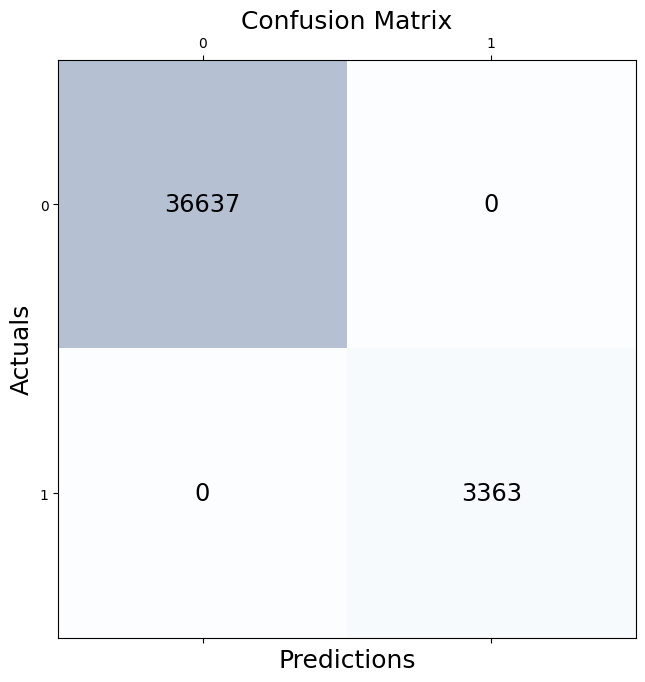

In [35]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#ANN with 4 hidden layers with varied units#

In [26]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
accuracy_score(y_test, y_pred)

[[36637     0]
 [    0  3363]]


1.0

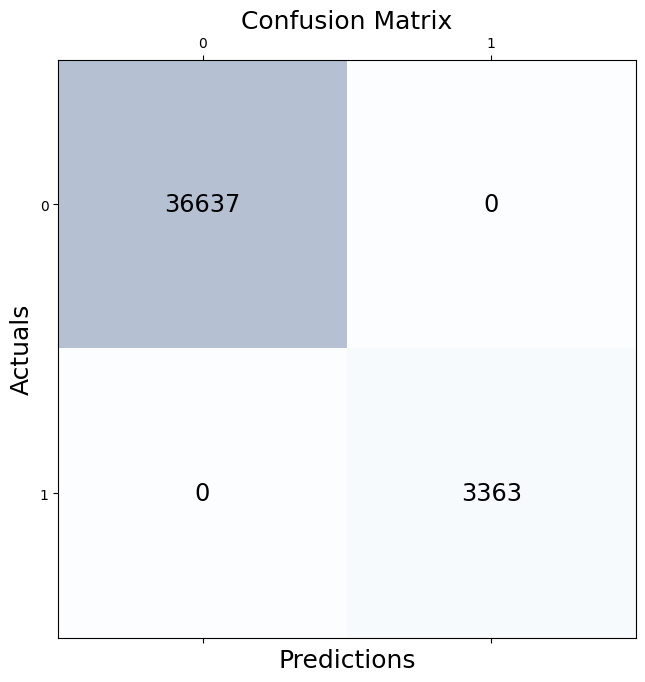

In [28]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# with different hidden layer activation

In [26]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
accuracy_score(y_test, y_pred)

[[36637     0]
 [    0  3363]]


1.0

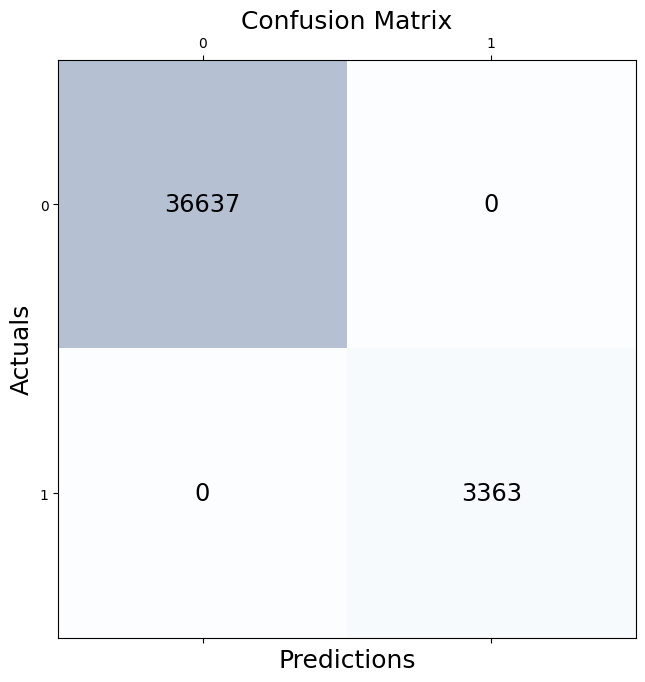

In [28]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#different optimizer 